In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import EDA_helper as helper

df = pd.read_csv('../../data/F_feature_selection/feature_selection-2023.csv', sep=";")


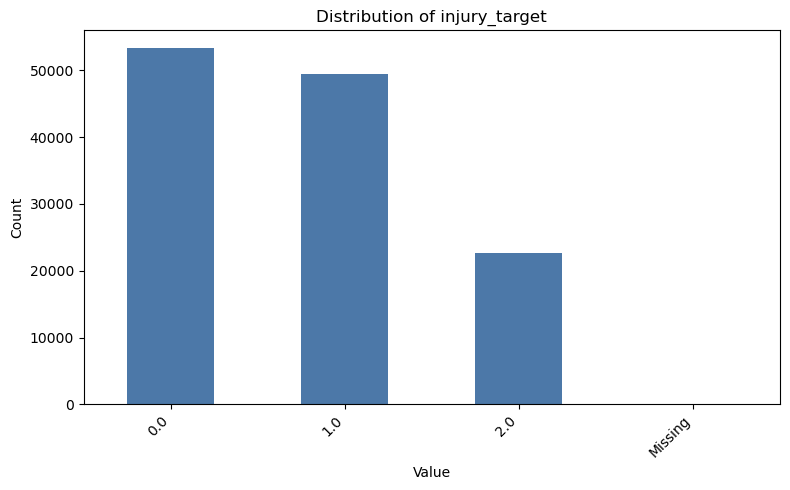

In [71]:
target_col = next((c for c in df.columns if c.lower() == "injury_target"), None)
if target_col is None:
    raise KeyError("Column 'injury_target' not found in DataFrame.")

# Count values (including NaN as 'Missing')
counts = df[target_col].astype("category")
counts = counts.cat.add_categories(["Missing"]).fillna("Missing").value_counts(dropna=False)

# Plot
plt.figure(figsize=(8, 5))
counts.plot(kind="bar", color="#4C78A8")
plt.title(f"Distribution of {target_col}")
plt.xlabel("Value")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [72]:
missing_count = df[target_col].isna().sum()
print(f"Missing (NaN) in {target_col}: {missing_count}")

Missing (NaN) in injury_target: 0


In [73]:
df_fe = pd.read_csv('../../data/D_feature_engineering/feature_engineering-2023.csv', sep=";")
df_mdh = pd.read_csv('../../data/E_missing_data_handling/missing_data_handling-2023.csv', sep=";")

# compare number of entries between tables
print(f"Feature Engineering DataFrame shape: {df_fe.shape}")
print(f"Missing Data Handling DataFrame shape: {df_mdh.shape}")
print(f"Feature Selection DataFrame shape: {df.shape}")

Feature Engineering DataFrame shape: (125789, 102)
Missing Data Handling DataFrame shape: (125505, 102)
Feature Selection DataFrame shape: (125505, 57)


In [74]:
helper.summarize_missing_values(df)

Analyzing missing values...
...Found missing values in 1 columns.


,missing_count,missing_percentage
vehicle_category_simplified_other,26472,21.092387


In [75]:
helper.compare_file_schemas('../../data/A_original',['users-2019.csv', 'users-2022.csv'])

Comparing schemas for files: ['users-2019.csv', 'users-2022.csv'] in path ../../data/A_original
  ...Successfully read header for users-2019.csv
  ...Successfully read header for users-2022.csv


,users-2019.csv,users-2022.csv,is_different
id_usager,False,True,True
Num_Acc,True,True,False
actp,True,True,False
an_nais,True,True,False
catu,True,True,False
etatp,True,True,False
grav,True,True,False
id_vehicule,True,True,False
locp,True,True,False
num_veh,True,True,False


In [76]:
helper.compare_file_schemas('../../data/F_feature_selection',['feature_selection-2019.csv', 'feature_selection-2020.csv', 'feature_selection-2021.csv','feature_selection-2022.csv', 'feature_selection-2023.csv'])

Comparing schemas for files: ['feature_selection-2019.csv', 'feature_selection-2020.csv', 'feature_selection-2021.csv', 'feature_selection-2022.csv', 'feature_selection-2023.csv'] in path ../../data/F_feature_selection
  ...Successfully read header for feature_selection-2019.csv
  ...Successfully read header for feature_selection-2020.csv
  ...Successfully read header for feature_selection-2021.csv
  ...Successfully read header for feature_selection-2022.csv
  ...Successfully read header for feature_selection-2023.csv


,feature_selection-2019.csv,feature_selection-2020.csv,feature_selection-2021.csv,feature_selection-2022.csv,feature_selection-2023.csv,is_different
accident_situation,True,True,True,True,True,False
month_cos,True,True,True,True,True,False
motor_type,True,True,True,True,True,False
motor_type_other,True,True,True,True,True,False
pedestrian_action,True,True,True,True,True,False
pedestrian_location,True,True,True,True,True,False
position,True,True,True,True,True,False
reserved_lane_present,True,True,True,True,True,False
road_complexity_index,True,True,True,True,True,False
role,True,True,True,True,True,False


In [77]:
helper.get_descriptive_summary(df)

Generating comprehensive descriptive summary...
...Summary generation complete.


,dtype,missing_percentage,unique_count,most_frequent_value,frequency_percentage,mean,std,min,25%,50%,75%,max
location,int64,0.000000,2,2,60.447791,1.604478,0.488964,1.000000,1.000000,2.000000e+00,2.000000,2.000000
type_of_collision,int64,0.000000,8,3,31.193180,3.762464,1.870234,-1.000000,2.000000,3.000000e+00,6.000000,7.000000
latitude,float64,0.000000,52841,49.205626,0.051791,44.124828,12.632738,-23.372504,44.742320,4.779996e+01,48.860024,51.047490
longitude,float64,0.000000,53082,6.120265,0.051791,1.949543,19.694778,-176.207000,1.226060,2.394657e+00,4.783328,168.095670
reserved_lane_present,int64,0.000000,5,0,87.437951,0.231592,0.690924,-1.000000,0.000000,0.000000e+00,0.000000,3.000000
horizontal_alignment,int64,0.000000,5,1,81.871639,1.288196,0.665688,-1.000000,1.000000,1.000000e+00,1.000000,4.000000
infrastructure,int64,0.000000,11,0,84.208597,0.789881,2.155736,-1.000000,0.000000,0.000000e+00,0.000000,9.000000
accident_situation,int64,0.000000,8,1,85.748775,1.534999,1.514370,-1.000000,1.000000,1.000000e+00,1.000000,8.000000
speed_limit,int64,0.000000,21,50,44.395044,60.099629,25.339870,-1.000000,50.000000,5.000000e+01,80.000000,130.000000
position,int64,0.000000,11,1,74.262380,2.092634,2.583389,-1.000000,1.000000,1.000000e+00,2.000000,10.000000
